<a href="https://colab.research.google.com/github/pphewchaoum/ML-Classification_AS1/blob/main/MLproject_log2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

v2 : จะแก้ไข
1.   feature selection
2.   cross valid 
3.   pipeline

In [ ]:
pip install pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
from sklearn import tree
from sklearn import metrics as metrics
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score ,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

sns.set()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Collect Data & EDA

In [ ]:
df_log=pd.read_csv('log2.csv')
df_log.info()
df_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24138 entries, 0 to 24137
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Source Port           24138 non-null  int64  
 1   Destination Port      24138 non-null  int64  
 2   NAT Source Port       24138 non-null  int64  
 3   NAT Destination Port  24138 non-null  int64  
 4   Action                24138 non-null  object 
 5   Bytes                 24137 non-null  float64
 6   Bytes Sent            24137 non-null  float64
 7   Bytes Received        24137 non-null  float64
 8   Packets               24137 non-null  float64
 9   Elapsed Time (sec)    24137 non-null  float64
 10  pkts_sent             24137 non-null  float64
 11  pkts_received         24137 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 2.2+ MB


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177.0,94.0,83.0,2.0,30.0,1.0,1.0
1,56258,3389,56258,3389,allow,4768.0,1600.0,3168.0,19.0,17.0,10.0,9.0
2,6881,50321,43265,50321,allow,238.0,118.0,120.0,2.0,1199.0,1.0,1.0
3,50553,3389,50553,3389,allow,3327.0,1438.0,1889.0,15.0,17.0,8.0,7.0
4,50002,443,45848,443,allow,25358.0,6778.0,18580.0,31.0,16.0,13.0,18.0


Attribute = 'Action'

<Axes: >

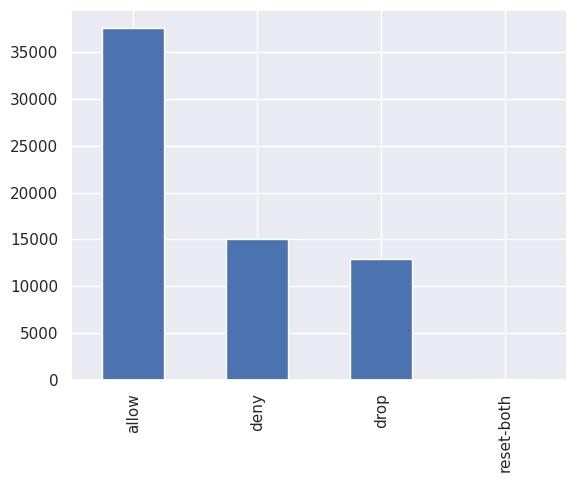

In [ ]:
## EDA number Type ###
df1 = df_log['Action'].value_counts()
type(df1)
df1.plot.bar()

<Axes: ylabel='Action'>

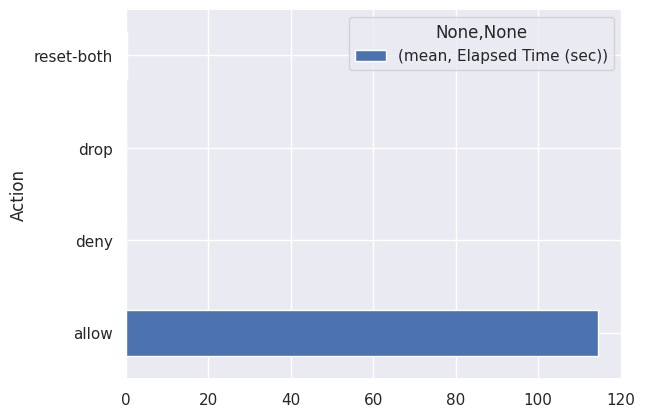

In [ ]:
# EDA Allow mean ##
df_pivot =df_log.pivot_table(index='Action',columns=None,values=['Elapsed Time (sec)'],aggfunc=['mean'])
type(df_pivot)
df_pivot.plot.barh()


<Axes: ylabel='Action'>

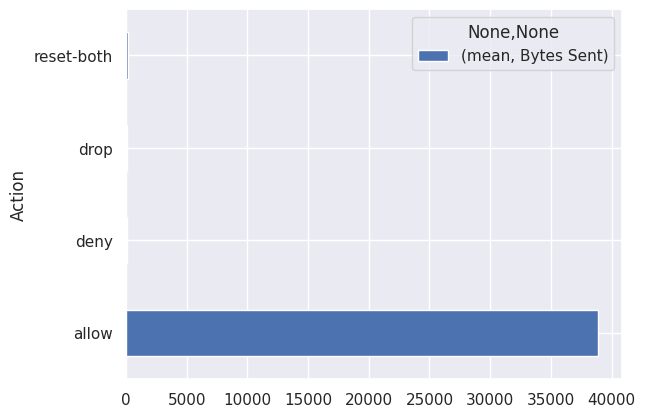

In [ ]:
df_pivot1 =df_log.pivot_table(index='Action',columns=None,values=['Bytes Sent'],aggfunc=['mean'])
type(df_pivot1)
df_pivot1.plot.barh()

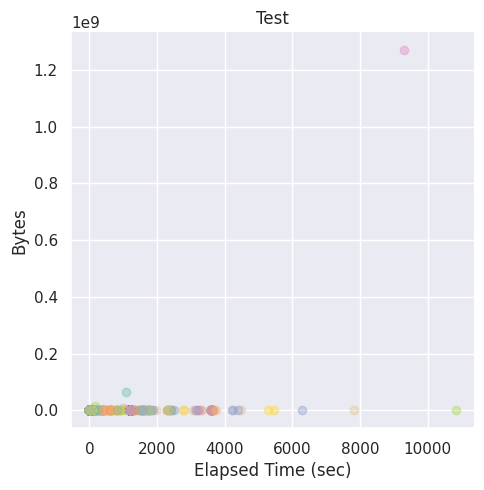

In [ ]:

## EDA correlation time vs bytes 
df33=df_log[df_log.Action=='allow'].pivot_table(index='Destination Port',columns=None,values=['Elapsed Time (sec)','Bytes'],aggfunc='mean').sort_values('Bytes',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Elapsed Time (sec)', y='Bytes',
            hue='Destination Port',
            markers="o",  
            palette="Set2",       
            scatter_kws=dict(alpha=0.4),  
            line_kws=dict(alpha=0.6),     
            legend=False
        ).set(title='Test')


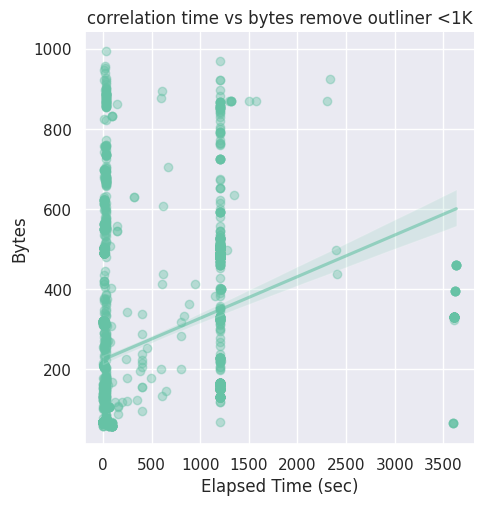

In [ ]:
### EDA remove outliner  from data source 
df = df_log[df_log.Bytes <= 1000]
df33=df[df.Action=='allow'].pivot_table(index=['Destination Port','Action'],columns=None,values=['Elapsed Time (sec)','Bytes'],aggfunc='mean').sort_values('Bytes',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Elapsed Time (sec)', y='Bytes',
            hue='Action',
            markers="o",  
            palette="Set2",       
            scatter_kws=dict(alpha=0.4),  
            line_kws=dict(alpha=0.6),     
            legend=False
        ).set(title='correlation time vs bytes remove outliner <1K')

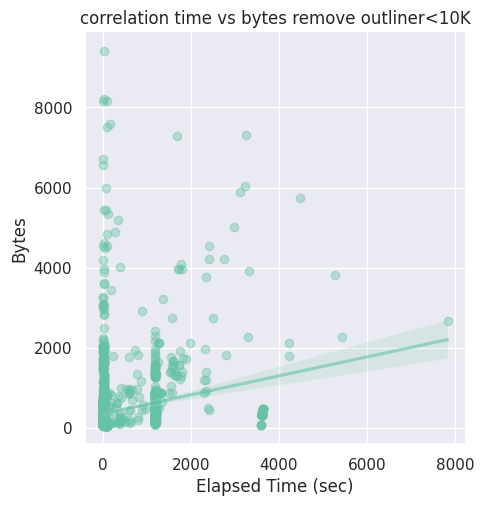

In [ ]:
### EDA remove outliner  from data source 
df = df_log[df_log.Bytes <= 10000]
df33=df[df.Action=='allow'].pivot_table(index=['Destination Port','Action'],columns=None,values=['Elapsed Time (sec)','Bytes'],aggfunc='mean').sort_values('Bytes',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Elapsed Time (sec)', y='Bytes',
            hue='Action',
            markers="o",  
            palette="Set2",       
            scatter_kws=dict(alpha=0.4),  
            line_kws=dict(alpha=0.6),     
            legend=False
        ).set(title='correlation time vs bytes remove outliner<10K')

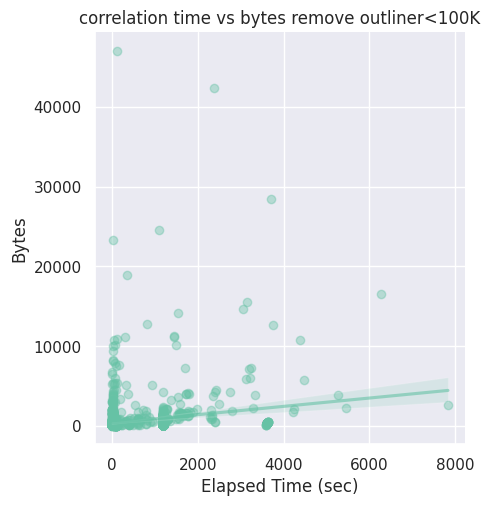

In [ ]:
### EDA remove outliner  from data source 
df = df_log[df_log.Bytes <= 100000]
df33=df[df.Action=='allow'].pivot_table(index=['Destination Port','Action'],columns=None,values=['Elapsed Time (sec)','Bytes'],aggfunc='mean').sort_values('Bytes',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Elapsed Time (sec)', y='Bytes',
            hue='Action',
            markers="o",  
            palette="Set2",       
            scatter_kws=dict(alpha=0.4),  
            line_kws=dict(alpha=0.6),     
            legend=False
        ).set(title='correlation time vs bytes remove outliner<100K')

,index,Destination Port,Action
0,10,53,15414
1,28,445,12891
2,26,443,11684
3,15,80,4035
4,1147,25174,1087
5,255,5900,909
6,1888,37965,826
7,1017,22114,767
8,3216,64147,756
9,2587,50584,717


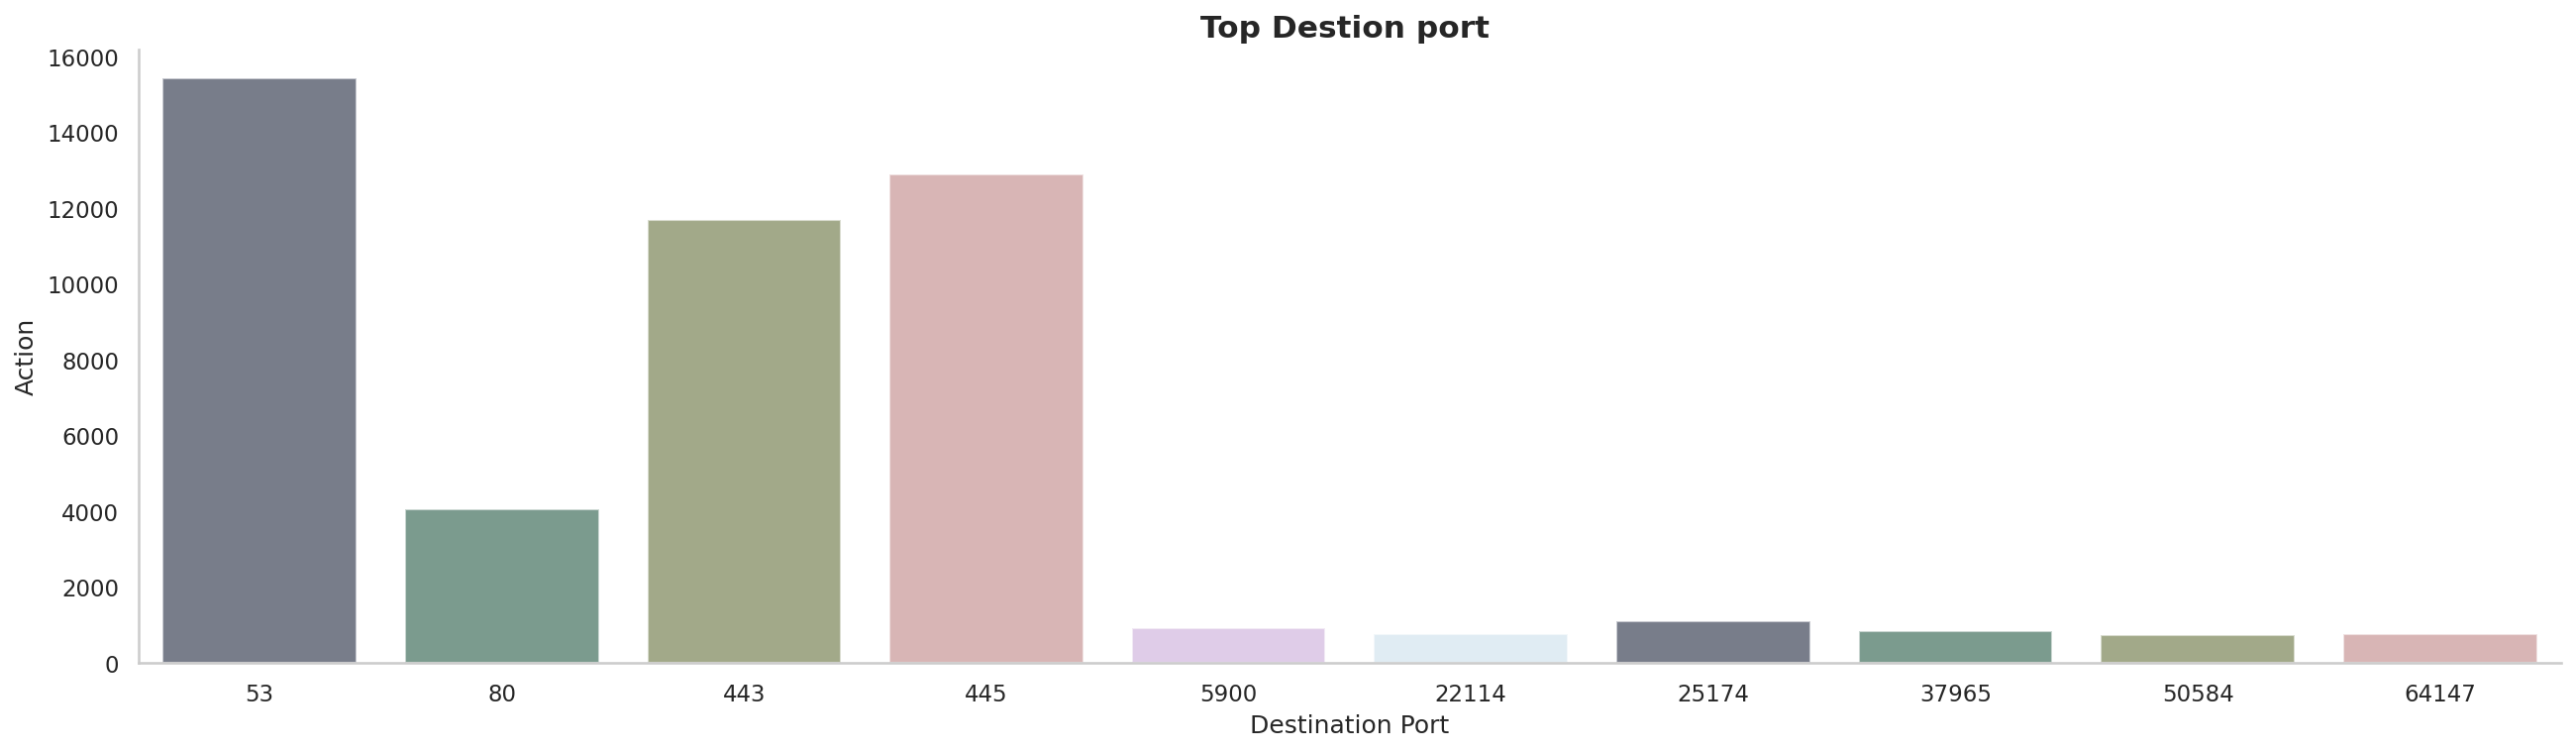

In [ ]:
### EDA Port count
df3=df_log[["Destination Port","Action"]].groupby("Destination Port",as_index=False).count().sort_values('Action',ascending=False).reset_index()
df33 = df3.iloc[0:10]
sns.set(rc={'figure.dpi':150})

sns.set_style("whitegrid", {'axes.grid' : False})
sns.catplot( kind='bar',
             data=df33,
             x='Destination Port',             # Axis to show the categories
             y='Action',     # Quantitative values
             height=5, aspect=3.5,
             alpha=0.6,palette=sns.color_palette("cubehelix"))
plt.title("Majority Destion port ",fontsize=15,fontweight="bold")
df33
       

,index,Source Port,Action
0,16951,58638,840
1,2744,27005,513
2,12,443,273
3,16021,57470,222
4,8584,49418,210
5,636,6881,177
6,0,0,173
7,9728,50584,116
8,360,3478,105
9,2724,26900,102


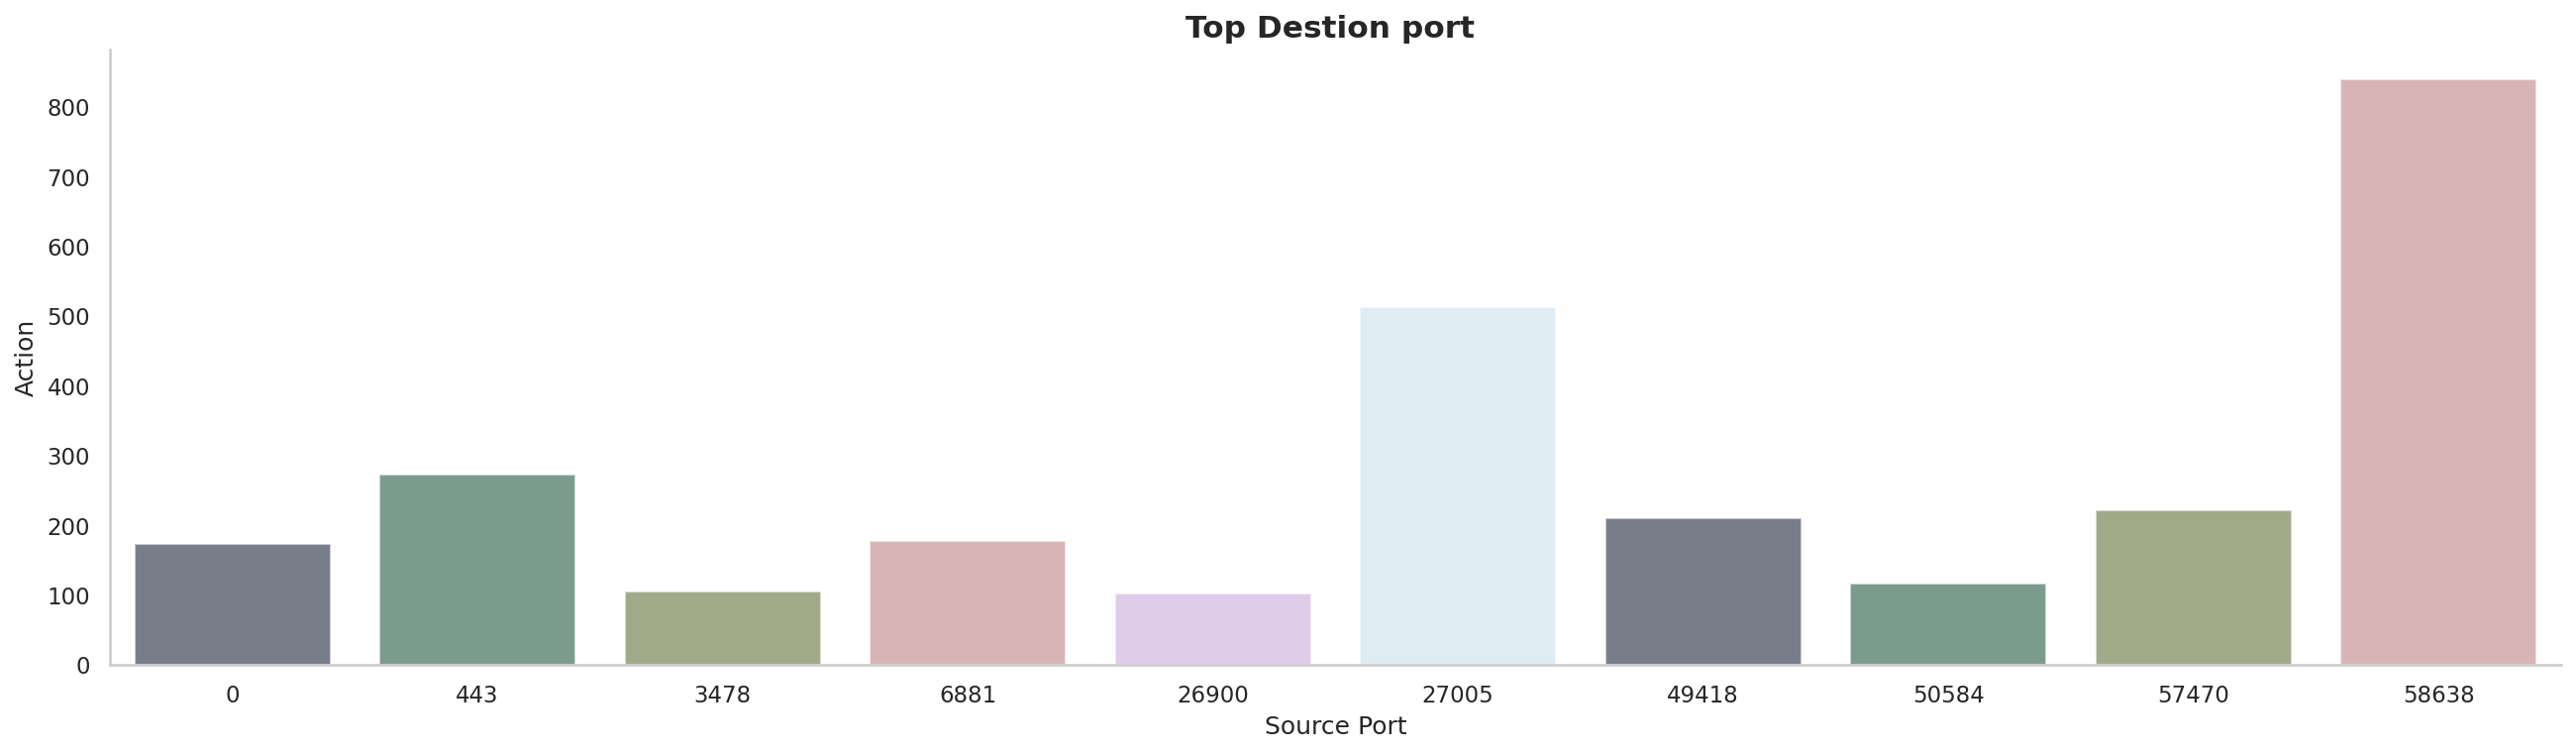

In [ ]:
### EDA Prot count ranking
df3=df_log[["Source Port","Action"]].groupby("Source Port",as_index=False).count().sort_values('Action',ascending=False).reset_index()
df33 = df3.iloc[0:10]
sns.set(rc={'figure.dpi':150})

sns.set_style("whitegrid", {'axes.grid' : False})
sns.catplot( kind='bar',
             data=df33,
             x='Source Port',             # Axis to show the categories
             y='Action',     # Quantitative values
             height=5, aspect=3.5,
             alpha=0.6,palette=sns.color_palette("cubehelix"))
plt.title("Majority Source Port",fontsize=15,fontweight="bold")
df33
       

In [ ]:
df_log.corr()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


<Axes: >

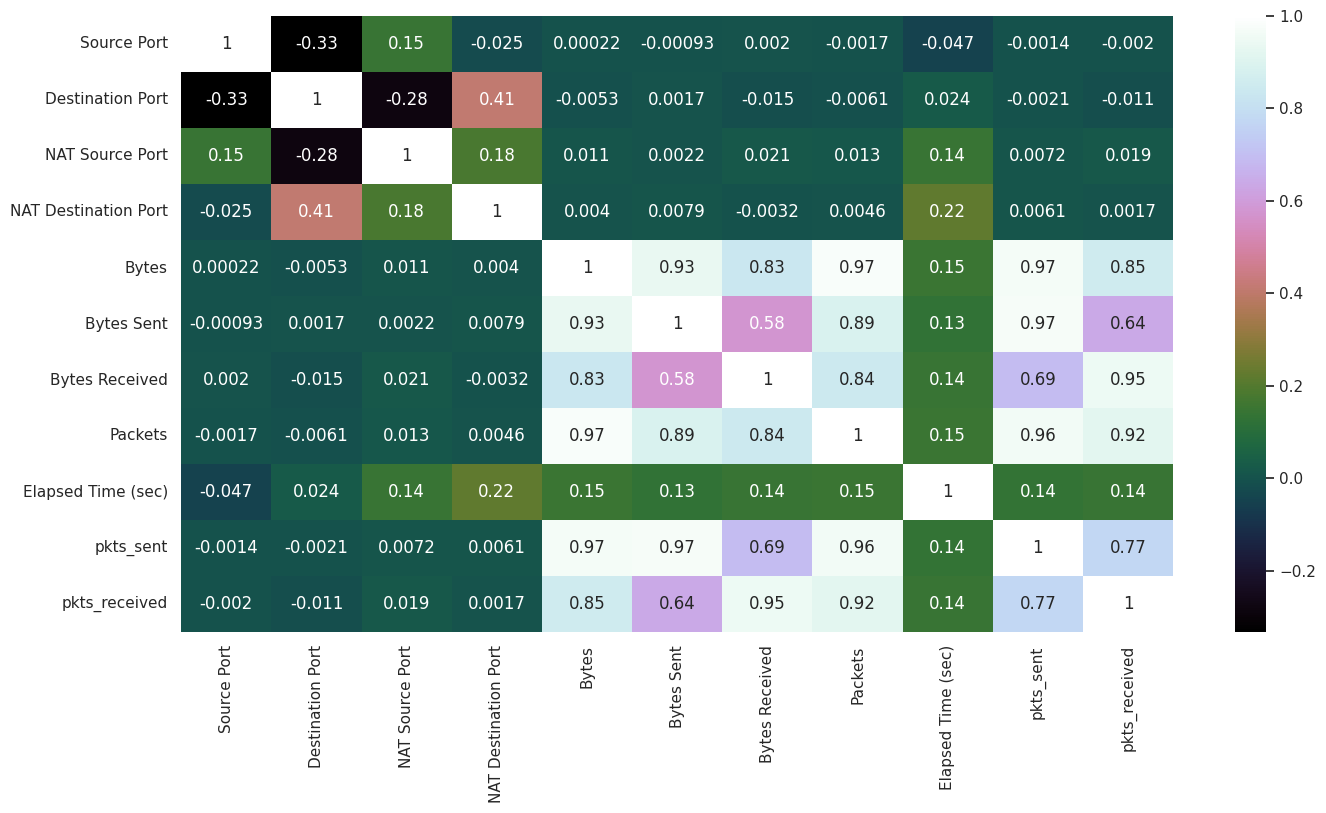

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_log.corr(), annot = True, fmt='.2g',cmap= 'cubehelix')

# Preparation

In [ ]:
string_to_int= preprocessing.LabelEncoder()  
df=df_log.apply(string_to_int.fit_transform)  #0=allow, 1=deny, 2=drop, 3=reset-both
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24138 entries, 0 to 24137
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Source Port           24138 non-null  int64
 1   Destination Port      24138 non-null  int64
 2   NAT Source Port       24138 non-null  int64
 3   NAT Destination Port  24138 non-null  int64
 4   Action                24138 non-null  int64
 5   Bytes                 24138 non-null  int64
 6   Bytes Sent            24138 non-null  int64
 7   Bytes Received        24138 non-null  int64
 8   Packets               24138 non-null  int64
 9   Elapsed Time (sec)    24138 non-null  int64
 10  pkts_sent             24138 non-null  int64
 11  pkts_received         24138 non-null  int64
dtypes: int64(12)
memory usage: 2.2 MB


In [ ]:
x=df.drop(columns='Action')
y=df['Action']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42,stratify=y)
print("Train Shape X: {} Y : {}".format(x_train.shape,y_train.shape))
print("Test Shape X: {} Y : {}".format(x_test.shape,y_test.shape))

ValueError: ignored

In [ ]:
y_train.value_counts()/y_test.value_counts()

0    1.000000
1    0.999867
2    1.000156
3    1.000000
Name: Action, dtype: float64

# Decision Tree

## 1.Cart

GridsearchCV

In [ ]:
tree_clas = DecisionTreeClassifier(random_state=1024)
param_tree = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
              'criterion' :['gini', 'entropy']}
grid_tree = GridSearchCV(estimator=tree_clas, param_grid=param_tree, cv=5, verbose=True)
grid_tree.fit(x_train, y_train)
grid_tree.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [ ]:
ans_tree = grid_tree.predict(x_test)
print(classification_report(y_test, ans_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18820
           1       0.99      1.00      1.00      7494
           2       1.00      1.00      1.00      6425
           3       0.00      0.00      0.00        27

    accuracy                           1.00     32766
   macro avg       0.75      0.75      0.75     32766
weighted avg       1.00      1.00      1.00     32766



Manual tuning hyperparameter

In [ ]:
best_f1 = 0
best_criterion = None
best_ccp_alph = None
best_max_depth = None
best_max_features = None

max_features={'auto', 'sqrt', 'log2'}
ccp_alpha= [0.1, 0.01, 0.001]
max_depth =[3,4,5,6,7,8,9,10]
criterion ={'gini', 'entropy'}

for i in max_features:
    for j in ccp_alpha:
          for k in max_depth:
            for l in criterion:
                tree_clas = DecisionTreeClassifier(random_state=1024,
                                                   max_features=i,
                                                   ccp_alpha = j,
                                                   max_depth = k,
                                                   criterion=l)
                tree_clas.fit(x_train, y_train)
                y_pred = tree_clas.predict(x_test)
                f1 = f1_score(y_test, y_pred ,average='weighted')
                if f1 > best_f1:
                    best_f1 = f1
                    best_max_features = i
                    best_ccp_alph = j
                    best_max_depth = k
                    best_criterion = l
          
print("Best F1 score:", best_f1)
print("Best max_features :", best_max_features)
print("Best ccp_alph:", best_ccp_alph)
print("Best max_depth:", best_max_depth)
print("Best best_criterion:", best_criterion)

Best F1 score: 0.9977873978924978
Best max_features : sqrt
Best ccp_alph: 0.001
Best max_depth: 8
Best best_criterion: entropy


In [ ]:
tree_clas = DecisionTreeClassifier(criterion='entropy', max_depth=9,random_state=1024,ccp_alpha=0.01)
tree_clas.fit(x_train, y_train)        
ans_tree= tree_clas.predict(x_test)  
print(classification_report(y_test, ans_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18820
           1       1.00      1.00      1.00      7494
           2       1.00      1.00      1.00      6425
           3       0.00      0.00      0.00        27

    accuracy                           1.00     32766
   macro avg       0.75      0.75      0.75     32766
weighted avg       1.00      1.00      1.00     32766



[Text(0.7142857142857143, 0.9, 'x[8] <= 0.5\nentropy = 1.416\nsamples = 32766\nvalue = [18820, 7493, 6426, 27]'),
 Text(0.5714285714285714, 0.7, 'x[1] <= 29.5\nentropy = 1.095\nsamples = 14114\nvalue = [173, 7491, 6426, 24]'),
 Text(0.42857142857142855, 0.5, 'x[1] <= 27.5\nentropy = 0.471\nsamples = 6977\nvalue = [173, 377, 6426, 1]'),
 Text(0.2857142857142857, 0.3, 'x[7] <= 0.5\nentropy = 0.928\nsamples = 533\nvalue = [173, 359, 0, 1]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.029\nsamples = 341\nvalue = [0, 340, 0, 1]'),
 Text(0.42857142857142855, 0.1, 'entropy = 0.466\nsamples = 192\nvalue = [173, 19, 0, 0]'),
 Text(0.5714285714285714, 0.3, 'entropy = 0.028\nsamples = 6444\nvalue = [0, 18, 6426, 0]'),
 Text(0.7142857142857143, 0.5, 'entropy = 0.031\nsamples = 7137\nvalue = [0, 7114, 0, 23]'),
 Text(0.8571428571428571, 0.7, 'entropy = 0.004\nsamples = 18652\nvalue = [18647, 2, 0, 3]')]

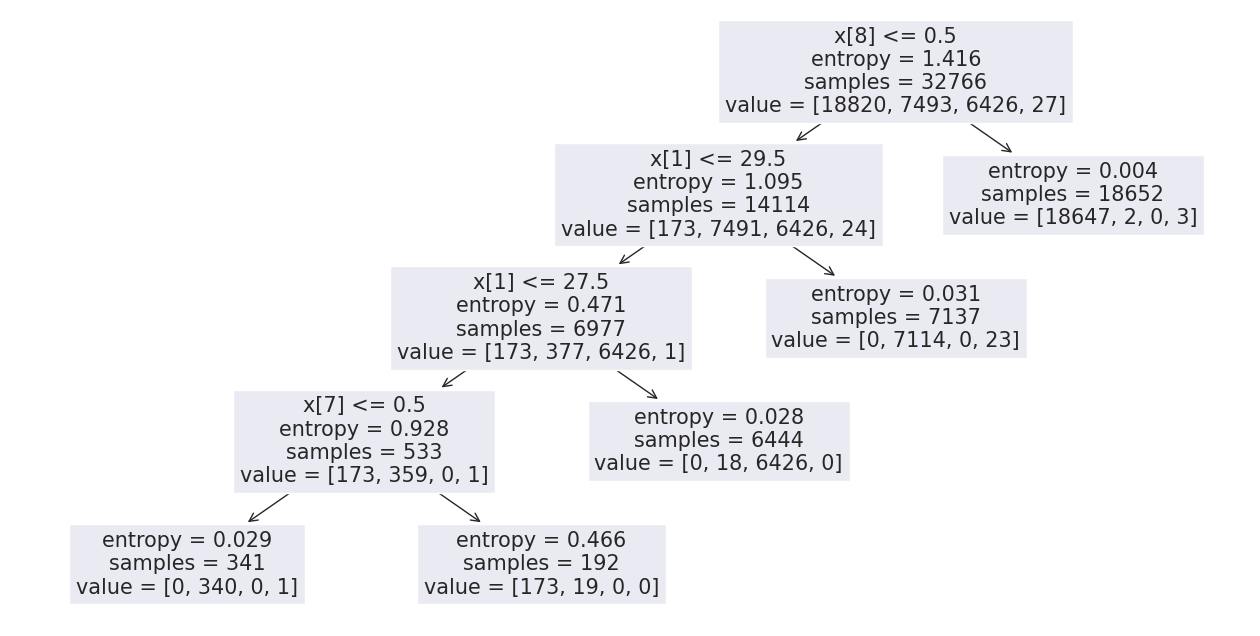

In [ ]:
tree.plot_tree(tree_clas)

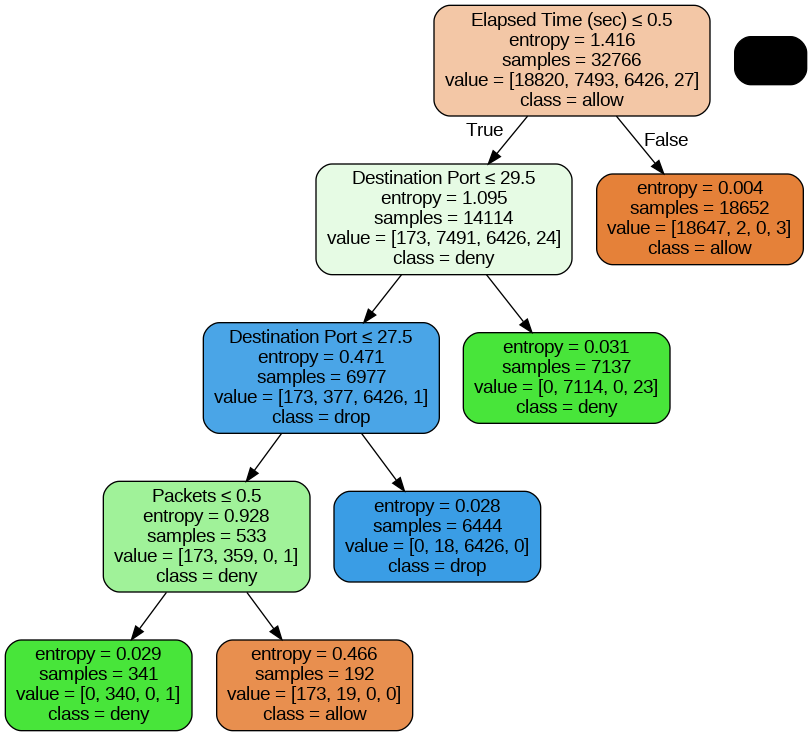

In [ ]:
feature_cols =list(x_train.columns)
dot_data = StringIO()
export_graphviz(tree_clas,
                out_file=dot_data, special_characters=True,
                filled=True, rounded=True, 
                feature_names =feature_cols,class_names=['allow','deny','drop','reset-both'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('log2-tree.png')
Image(graph.create_png())

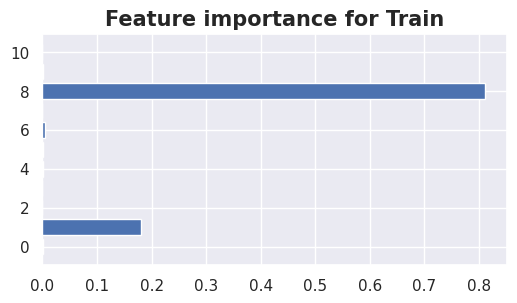

Text(0.5, 1.0, 'Feature importance for Test')

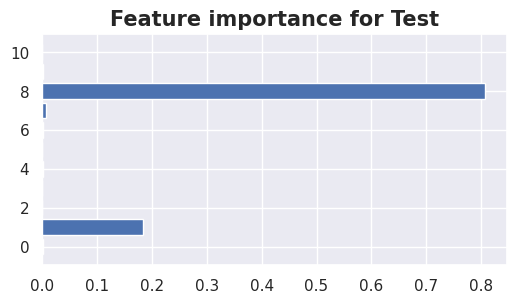

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.figure(figsize=(6, 3))


model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_

# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
plt.title("Feature importance for Train",fontsize=15,fontweight="bold")
pyplot.show()


plt.figure(figsize=(6, 3))
model.fit(x_test, y_test)
# get importance
importance = model.feature_importances_

# summarize feature importance

# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
plt.title("Feature importance for Test",fontsize=15,fontweight="bold")

## 2.Random Forest

GridSearchCV

In [ ]:
RT_clas = RandomForestClassifier(n_estimators=100,random_state=1024) 
param_RT = {'max_features': ['auto', 'sqrt', 'log2'], 
                    'ccp_alpha': [0.1, .01, .001], 
                    'max_depth' : [2,3, 4, 5, 6, 7], 
                    'criterion' :['gini', 'entropy']} 
grid_RT = GridSearchCV(estimator=RT_clas, param_grid=param_RT, cv=5, verbose=True) 
grid_RT.fit(x_train, y_train) 
grid_RT.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto', random_state=1024)

In [ ]:
ans_RT = grid_RT.predict(x_test)
print(classification_report(y_test, ans_RT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11292
           1       1.00      1.00      1.00      4496
           2       1.00      1.00      1.00      3856
           3       0.00      0.00      0.00        16

    accuracy                           1.00     19660
   macro avg       0.75      0.75      0.75     19660
weighted avg       1.00      1.00      1.00     19660



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7528
           1       1.00      0.99      1.00      2998
           2       1.00      1.00      1.00      2570
           3       0.00      0.00      0.00        11

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107



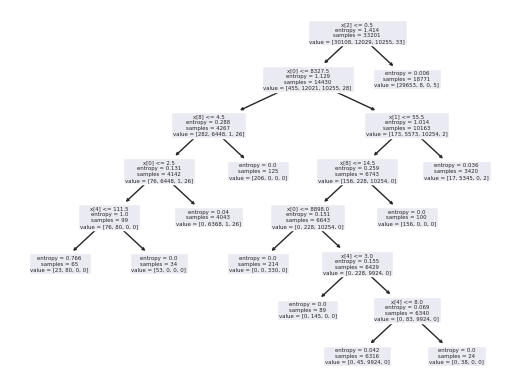

<Figure size 1800x1800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
RF_cls = RandomForestClassifier(max_depth=7, criterion='entropy',ccp_alpha=0.001, random_state=1024)
RF_cls.fit(x_train, y_train.astype(int))

ans_RF = RF_cls.predict(x_test)
print(classification_report(y_test, ans_RF))

tree.plot_tree(RF_cls.estimators_[0])
fig = plt.gcf()
plt.figure(figsize=(12,12), dpi=150)
plt.show()
plt.savefig('log2-RandomForest1.pdf')

## 3.XGBoot

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7528
           1       1.00      1.00      1.00      2998
           2       1.00      1.00      1.00      2570
           3       1.00      0.27      0.43        11

    accuracy                           1.00     13107
   macro avg       1.00      0.82      0.86     13107
weighted avg       1.00      1.00      1.00     13107



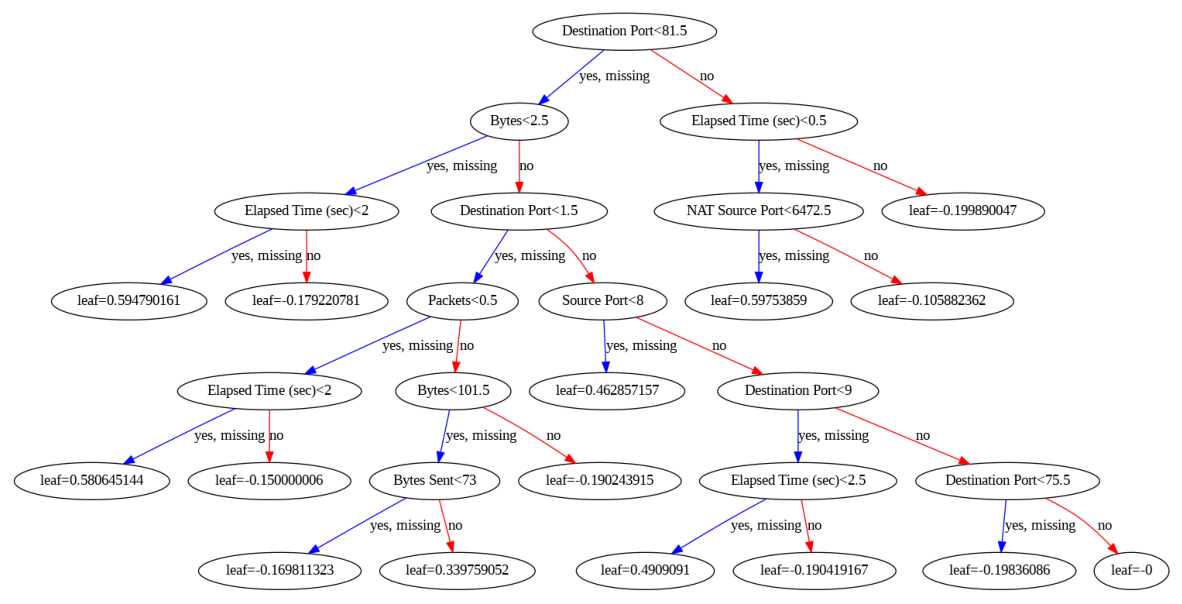

<Figure size 640x480 with 0 Axes>

In [ ]:
xgb_cls = xgb.XGBClassifier(use_label_encoder=False, n_estimators=10)
xgb_cls.fit(x_train, y_train.astype(int))

ans_xgb = xgb_cls.predict(x_test)
print(classification_report(y_test, ans_xgb))

plot_tree(xgb_cls, rankdir='UT', num_trees=1)
fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show()
plt.savefig('log2-xgboot.png')

# k-NN

GridsearchCV

In [ ]:
knn = KNeighborsClassifier()
parameters = {"n_neighbors": range(1,11),
                      "metric": ('minkowski','euclidean','manhattan'),
                      "weights": ('uniform','distance')}
grid_knn = GridSearchCV(knn, parameters, cv=5)
grid_knn.fit(x_train,y_train)
grid_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [ ]:
ans_knn = grid_knn.predict(x_test)
print(classification_report(y_test, ans_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7528
           1       0.99      0.99      0.99      2998
           2       0.99      1.00      0.99      2570
           3       0.33      0.09      0.14        11

    accuracy                           0.99     13107
   macro avg       0.83      0.77      0.78     13107
weighted avg       0.99      0.99      0.99     13107



Manual tuning hyperparameter

In [ ]:
best_f1 = 0
best_k = None
best_weight = None

weight = {'uniform','distance'}
metric = {'minkowski','euclidean','manhattan'}
for k in range(1, 11):
    for i in weight:
          for j in metric:
            knn = KNeighborsClassifier(n_neighbors=k,weights = i,metric = j)
            knn.fit(x_train, y_train)
            y_pred = knn.predict(x_test)
            f1 = f1_score(y_test, y_pred ,average='weighted')
            if f1 > best_f1:
                best_f1 = f1
                best_k = k
                best_weight = i
                best_metric = j
          
print("Best F1 score:", best_f1)
print("Best number of neighbors:", best_k)
print("Best weight:", best_weight)
print("Best metric:", best_metric)

Best F1 score: 0.9933359996132
Best number of neighbors: 1
Best weight: uniform
Best metric: manhattan


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3,weights ='distance',metric ='manhattan')
knn.fit(x_train,y_train)
ans_knn = knn.predict(x_test)
print(classification_report(y_test, ans_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7528
           1       0.99      0.99      0.99      2998
           2       0.98      1.00      0.99      2570
           3       1.00      0.09      0.17        11

    accuracy                           0.99     13107
   macro avg       0.99      0.77      0.79     13107
weighted avg       0.99      0.99      0.99     13107



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model1 = KNeighborsClassifier()

encoder = preprocessing.LabelEncoder() 
prepare = StandardScaler()


modelPipeline = Pipeline(steps =  [('encoder',encoder),
                                  ('prepara',prepare),
                                  ('model1', KNeighborsClassifier(n_neighbors = 3,weights ='distance',metric ='manhattan'))
                                  ],verbose=True)

modelScore = cross_val_score(modelPipeline, x_train, y_train, cv = 10)

print(f'Accuracy: {modelScore}')

print(f'Accuracy average: {modelScore.mean()}')

NameError: ignored